https://www.kaggle.com/code/abhishekdmc4/svm-email-spam-ham/notebook

In [64]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# data = pd.read_csv('spambase.data', sep=",", names=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab",
#                    "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_semicolon", "char_freq_left_paren", "char_freq_left_bracket", "char_freq_exclamation", "char_freq_dollar", "char_freq_pound", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "is_spam"])

In [85]:
data = pd.read_csv('selected_data_44.csv').drop(columns=['Unnamed: 0']) 
data.rename(columns={"class":"is_spam"}, inplace=True)

In [86]:
# splitting into X and y
X = data.drop("is_spam", axis = 1)
y = data.is_spam.values.astype(int)

In [87]:
# scaling the features
# x = x-mean(x)/std(x)

X = scale(X)

In [88]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [89]:
# confirm that splitting also has similar distribution of spam and ham emails
print(y_train.mean())
print(y_test.mean())

0.3978260869565217
0.38522809558291093


In [90]:
# Model building

# instantiate an object of class SVC()
# using cost C=1
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [56]:
# Evaluate the model using confusion matrix 
# true positive, false positive
# false negative, true negative
# from sklearn import metrics
# metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[809,  40],
       [ 55, 477]], dtype=int64)

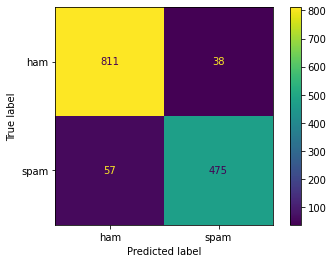

In [96]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

In [97]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9312092686459088
precision 0.9259259259259259
recall 0.8928571428571429



  ___________________________________________________________________________________________________________________________________________



















In [98]:
# specificity (% of hams correctly classified)
print("specificity", 811/(811+38))

specificity 0.9552414605418139


92% of all emails are classified correctly;
88.5% of spams are identified correctly (sensitivity/recall);
Specificity, or % of hams classified correctly, is 95%

In [59]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [60]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [61]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.90062112 0.93944099 0.92701863 0.91925466 0.9363354 ]
mean accuracy = 0.9245341614906831


Grid Search to Find Optimal Hyperparameter C

In [62]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)  

In [63]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.153791,0.029682,0.079229,0.006343,0.1,{'C': 0.1},0.885093,0.906832,0.903727,0.903727,...,0.904658,0.012329,5,0.920031,0.912655,0.916925,0.913432,0.910714,0.914752,0.003318
1,0.082117,0.002796,0.043036,0.002057,1,{'C': 1},0.900621,0.939441,0.927019,0.919255,...,0.924534,0.013909,3,0.946817,0.942547,0.945264,0.942158,0.940217,0.943401,0.002347
2,0.082999,0.005872,0.040948,0.005187,10,{'C': 10},0.905280,0.942547,0.928571,0.927019,...,0.927640,0.012446,1,0.969720,0.965450,0.963898,0.966227,0.962733,0.965606,0.002388
3,0.116156,0.002109,0.037089,0.004741,100,{'C': 100},0.913043,0.931677,0.933230,0.928571,...,0.925776,0.007375,2,0.985248,0.984084,0.982143,0.982531,0.983696,0.983540,0.001114
4,0.162027,0.018605,0.028597,0.001823,1000,{'C': 1000},0.909938,0.939441,0.927019,0.917702,...,0.923913,0.009870,4,0.992624,0.991460,0.991071,0.991460,0.991071,0.991537,0.000571


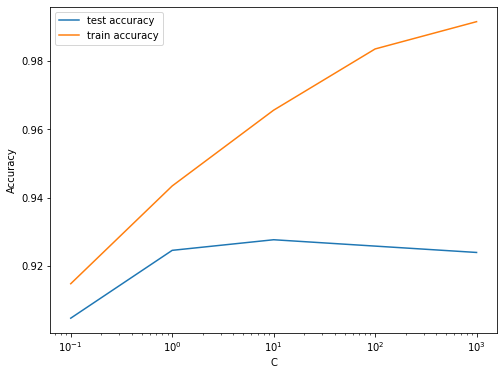

In [ ]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [ ]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.927639751552795 at C = 10


In [ ]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [ ]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9261404779145547
precision 0.9103053435114504
recall 0.8966165413533834


In [ ]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.927639751552795 at C = {'C': 10}


# Tuning hyper-parameters for precision
 The highest precision score is 0.9270001900999605 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
 The highest recall score is 0.8917174462620009 at C = {'C': 10}


